Dataset from: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
books = pd.read_csv("/Users/annie/Documents/GitHub/book-recommendation-system-pc/data/BX-Books.csv", delimiter =';', error_bad_lines= False, encoding="latin-1")
books.head()

/var/folders/_d/2z84qrrd7pd6xblnklsbfnm80000gn/T/ipykernel_1583/2995063115.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv("/Users/annie/Documents/GitHub/book-recommendation-system-pc/data/BX-Books.csv", delimiter =';', error_bad_lines= False, encoding="latin-1")
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users = pd.read_csv("/Users/annie/Documents/GitHub/book-recommendation-system-pc/data/BX-Users.csv", delimiter=";", error_bad_lines=False, encoding="latin-1")
users.head()

/var/folders/_d/2z84qrrd7pd6xblnklsbfnm80000gn/T/ipykernel_1583/957799969.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv("/Users/annie/Documents/GitHub/book-recommendation-system-pc/data/BX-Users.csv", delimiter=";", error_bad_lines=False, encoding="latin-1")


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings = pd.read_csv("/Users/annie/Documents/GitHub/book-recommendation-system-pc/data/BX-Book-Ratings.csv", delimiter=";", error_bad_lines=False, encoding="latin-1")
ratings.head()

/var/folders/_d/2z84qrrd7pd6xblnklsbfnm80000gn/T/ipykernel_1583/440475384.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv("/Users/annie/Documents/GitHub/book-recommendation-system-pc/data/BX-Book-Ratings.csv", delimiter=";", error_bad_lines=False, encoding="latin-1")


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
x = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
x['Rating-Count'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
x.sort_values(inplace = True, by='Rating-Count', ascending = False)
x.head()


,Book-Rating,Rating-Count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


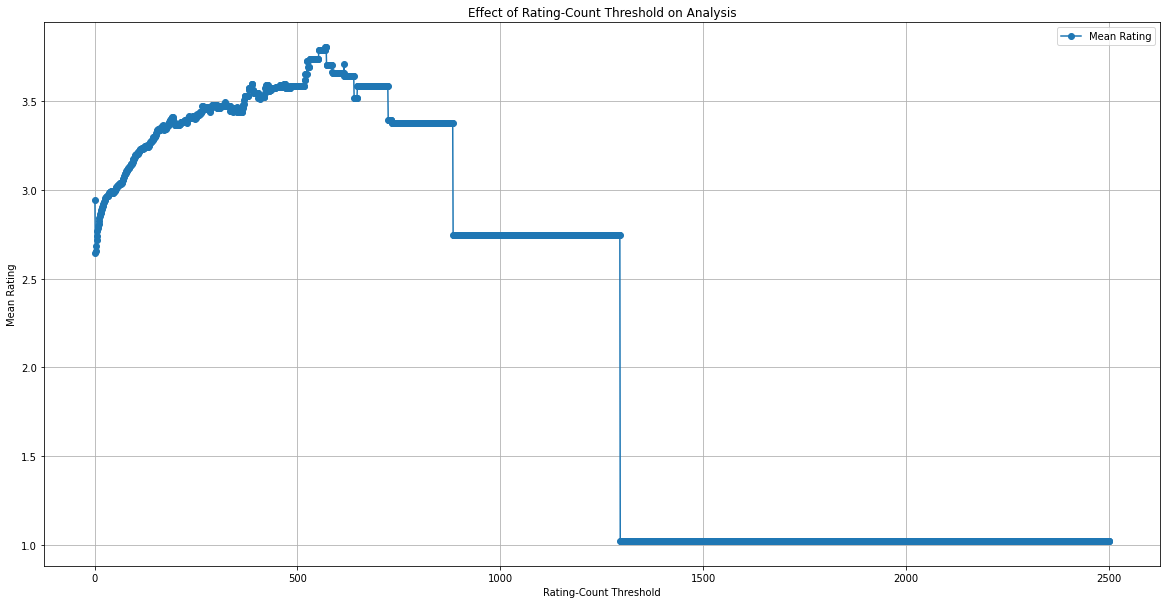

Best Rating-Count Threshold: 569 - Mean Rating: 3.81
       User-ID        ISBN  Book-Rating_x
0       276733  2080674722              0
1       192101  2080674722              7
2       201170  2080674722              4
3       276746  0449006522              0
4       278026  0449006522              8
...        ...         ...            ...
69893   271173  0684830817              7
69894   275401  0671015869              0
69895   276641  0671015869              7
69896   276018  3150000645              7
69897   276538  3150000645              0

[69898 rows x 3 columns]


In [7]:
max_threshold = max(x['Rating-Count'])

best_threshold = None
best_mean_rating = -1  

thresholds = []
mean_ratings = []

for threshold in range(1, max_threshold + 1):
    filtered_data = x[x['Rating-Count'] >= threshold]
    
    if not filtered_data.empty:
        
        mean_rating = filtered_data['Book-Rating'].mean()

        thresholds.append(threshold)
        mean_ratings.append(mean_rating)

        # Update the best threshold if a higher mean rating is found
        if mean_rating > best_mean_rating:
            best_mean_rating = mean_rating
            best_threshold = threshold

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Threshold': thresholds, 'Mean_Rating': mean_ratings})

plt.figure(figsize=(20, 10))
plt.plot(results_df['Threshold'], results_df['Mean_Rating'], marker='o', label='Mean Rating')
plt.xlabel('Rating-Count Threshold')
plt.ylabel('Mean Rating')
plt.title('Effect of Rating-Count Threshold on Analysis')
plt.legend()
plt.grid(True)
plt.show()

# Print the best threshold and corresponding mean rating
print(f"Best Rating-Count Threshold: {best_threshold} - Mean Rating: {best_mean_rating:.2f}")
filtered_ratings = x[(3.5 <= x['Book-Rating'])&(x['Book-Rating'] <= best_mean_rating) & (x['Rating-Count'] <= best_threshold)]
filtered_ratings
merged_ratings = pd.merge(ratings, filtered_ratings, on='ISBN', how='inner')

filtered_ratings = merged_ratings[['User-ID', 'ISBN', 'Book-Rating_x']]
print(filtered_ratings)


Rating Matrix

In [10]:
ratings_pivot = filtered_ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating_x')
print(ratings_pivot.shape)
ratings_pivot.head()

(22448, 8633)


ISBN,9022906116,0 907 062 008,0001033085,000160418X,0002190915,000222335X,0002237458,0002243806,0002250101,0002251485,...,B0000AA9IZ,B0000E63CJ,B0001FZGPI,ISSN11238356,N0553212583>>,NA1508/2003,Narraciones,O345366387,O446612545,"\2842053052\"""""
User-ID,,,,,,,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ratings_pivot.columns

Index([' 9022906116', '0 907 062 008', '0001033085', '000160418X',
       '0002190915', '000222335X', '0002237458', '0002243806', '0002250101',
       '0002251485',
       ...
       'B0000AA9IZ', 'B0000E63CJ', 'B0001FZGPI', 'ISSN11238356',
       'N0553212583>>', 'NA1508/2003', 'Narraciones', 'O345366387',
       'O446612545', '\2842053052\""'],
      dtype='object', name='ISBN', length=8633)

In [17]:
book_ratings = ratings_pivot['O345366387']
similar_to_book = ratings_pivot.corrwith(book_ratings)
similar_to_book

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
